# Project 1: Plinko, all the way down

**Name(s):**

1.

2.

3.


---

In this project, we will see topics on Expectation and Variance, for a variety of Discrete Random Variables, in action in the great game of **Plinko**, as played on the game show _The Price is Right_.

---

**Project Rules:**

* You can work in groups of **up to 3 students**.
* You are encouraged to collaborate with others and other groups in the class, but different groups' submissions should be different.
* You must **show all work** and **fully justify** your solutions.
* You will lose points if you supply a text answer (say, providing an explanation, or the distribution of a parameter) in a code cell.
* The notebook is partitioned into a few different sections, each of which accompanies a different day of lecture as detailed on the course schedule on myCourses. Toward the end, the problems will rely on previous days of lecture material as well, and **may require some time outside of class to complete**. Please plan accordingly with your group.

---

<br>


<br>

---

## Accompanying Tuesday 26 Sep, Expectation and Variance...

### Task 1

The Plinko Enthusiasts Club has thousands of registered members. Their data on how many members attended $X$ tapings of The Price is Right last month is shown below, including the pmf given by $p(x)$. Compute the expected number of tapings that a PE attends. Your calculations should be done in R in a code cell. No need to write them out in LaTeX unless that brings you joy.


|  x               | 1  | 2  | 3  | 4  | 5  | 6  | 7  |
|:-----------------|--- |--- |--- |--- |--- |--- |--- |
|p(x)              |0.01|0.03|0.13|0.25|0.39|0.17|0.02|
|number registered |150 |450 |1950|3750|5850|2550|300 |

In [2]:
# SOLUTION:

EX = 1*0.01 + 2*0.03 + 3*0.13 + 4*0.25 + 5*0.39 + 6*0.17 + 7*0.02
print(paste("E[X] =",EX))

[1] "E[X] = 4.57"


### Task 2

Each time a Plinko Enthusiast attends a taping of The Price is Right, they have a 10% probability of being selected as a contestant. Let's next sort out how many tapings a PE typically needs to attend before (and including) the first time they are selected as a contestant.

Define $X$ as the number of tapings before (and including) the first selection as a contestant. $X$ has a Geometric distribution with parameter $p=1/10$. We want to know $E[X]$. Let's first estimate it by drawing samples from this distribution and calculating their mean.

Run the cell below to draw a sample. Do not alter the cell so that the sample is the same for all of us.

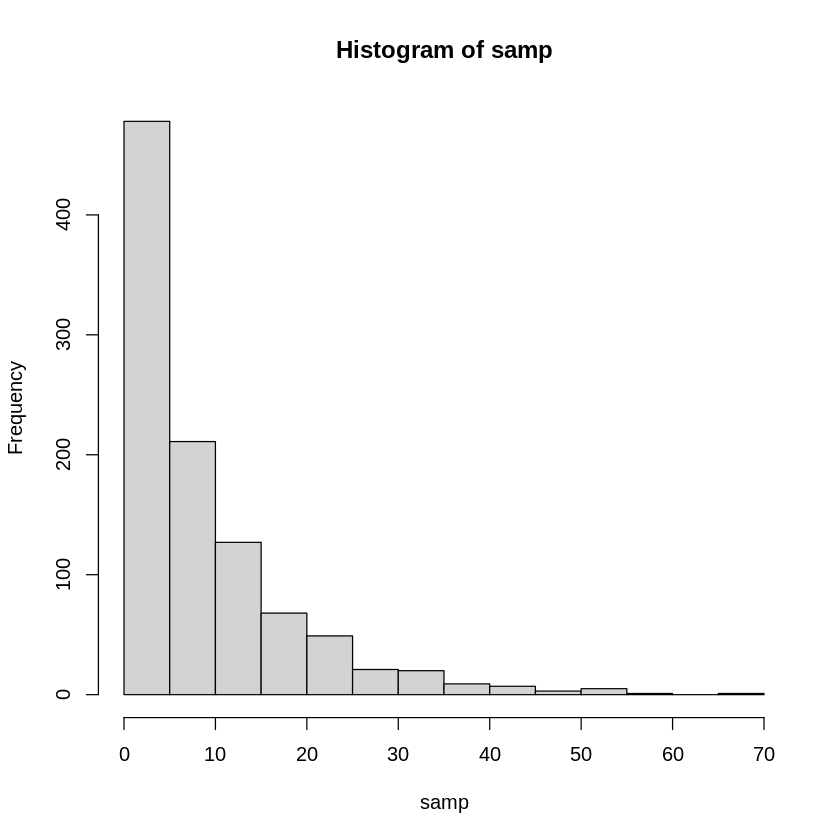

In [3]:
set.seed(251)
samp = rgeom(prob=1/10, n=1000)
hist(samp)

It's a little weird that the histogram would begin at 0, isn't it? Since you can't get your first success in 0 tries...

This weirdsy is because R's geometric distribution is how many failures before first success (**not including** the first success), whereas our convention from class, the textbook, and WebWork is to **include** the first success. To account for this, we just have to add 1 to the sampled geometric random variables.



In [4]:
samp = samp + 1

Now we can estimate the mean of the Geo(p=1/10) geometric distribution by computing the mean of our samples from this distribution.

In [5]:
mean(samp)

[1] 10.106

Try changing $p$ to be 1/2, 1/4, or 1/7. How does the mean change with $p$?  _Note: don't forget to add 1 to your samples to account for R's weirdness!_

In [6]:
# SOLUTION:

samp = rgeom(prob=1/2, n=1000)+1
print(mean(samp))

samp = rgeom(prob=1/4, n=1000)+1
print(mean(samp))

samp = rgeom(prob=1/7, n=1000)+1
print(mean(samp))

[1] 1.936
[1] 3.972
[1] 7.293


Now try some $p$ values like 2/3, 3/4, or 5/7.

In [7]:
# SOLUTION:

samp = rgeom(prob=2/3, n=1000)+1
print(mean(samp))

samp = rgeom(prob=3/4, n=1000)+1
print(mean(samp))

samp = rgeom(prob=5/7, n=1000)+1
print(mean(samp))

[1] 1.482
[1] 1.341
[1] 1.375


Discuss with your group what you hypothesize is the relationship between the mean of a geometric random variable and its parameter $p$. Record your thoughts below in a Markdown text cell and in the class Google Jamboard [here](https://jamboard.google.com/d/1e-9OB5QMVzNBlsB-6muu_KIOE6YH3IVqe4Xi_xDlEoA/edit?usp=sharing).

### SOLUTION:

It looks like the mean decreases as $p$ increases. With $p=1/a$, it looks like the mean is generally equal to $a$.

### Task 3

Plinko Winners often go down the street to an animal shelter and use their winnings to adopt wonderful pets. S'pose the adoption fees associated with each type of animal are given in the table below. We want to know the expected value of the fee collected on any given adoption.

| Animal (x) | $P(x)$ | Fee, $h(x)$ |
| ---        | ---    | ---         |
| dog        | 1/3    | \$100       |
| cat        | 1/3    | \$90        |
| rabbit     | 1/6    | \$50        |
| bird       | 1/6    | \$20        |

Recall that the formula for the expected value of a random variable $X$ with probability mass function $p(x)$ is
$$E[X] = \sum_x x\ p(x)$$

Now if the adoption fee, $y = h(x)$, is a _function of the random variable $x$_, we should do something similar to weight the possible values for $y$ (the fee) by their probabilities, and then add them all up to form a weighted average.

$$E[Y] = \sum_y y\ p(y)$$

But the probabilities $p(y)$ are just the probabilities of the $x$ values that yield $y = h(x)$. So we can rewrite as:

$$E[Y] = \sum_x h(x)\ p(x)$$

You should complete the actual calculation in R in a code cell, but you should set up the equation that you're using in Markdown/LaTeX.

### SOLUTION:

$E[Y] = 100\cdot 1/3 + 90\cdot 1/3 + 50 \cdot 1/6 + 20\cdot 1/6 = 75$ dollars

In [8]:
100*1/3 + 90*1/3 + 50*1/6 + 20*1/6

[1] 75

### Task 4

Suppose the US chapter of Plinko Enthusiasts has kept track of the temperature for the past month because they believe that contestants perform better on warmer days. The temperatures are given by the data set `tempUS`, located on my GitHub repository for this course. We can load the data into the `tempUS` variable below, in degrees Fahrenheit. Don't change the `tempUS` variable at all, otherwise your temperature data will be not match the solutions.

In [ ]:
### CODE FOR TONY: GENERATING THE DATA -- DELETE
set.seed(251)
tempUS = round(rnorm(mean=65, sd=10, n=30),2)
print(tempUS)
write.table(tempUS, file="./tempUS.csv", row.names=FALSE, col.names=FALSE)

 [1] 56.41 61.38 60.91 43.64 73.58 61.74 56.65 64.63 70.62 57.26 55.83 70.45
[13] 47.83 73.08 69.21 57.33 65.83 62.54 74.19 49.21 64.47 66.03 46.56 65.66
[25] 65.50 58.01 58.75 48.48 68.18 56.99


In [9]:
# read the temperature data
tempUS = read.csv("https://raw.githubusercontent.com/tonyewong/math251_fall2023/master/tempUS.csv", header=FALSE)[,1]
print(tempUS)

 [1] 56.41 61.38 60.91 43.64 73.58 61.74 56.65 64.63 70.62 57.26 55.83 70.45
[13] 47.83 73.08 69.21 57.33 65.83 62.54 74.19 49.21 64.47 66.03 46.56 65.66
[25] 65.50 58.01 58.75 48.48 68.18 56.99


Compute the mean and variance of the temperatures from the US PE chapter. Include units because you fear rogue Physics professors who roam the land in search of hapless abandoned numbers to corrupt and turn into irrational numbers. Note that you _could_ do this by hand, or you could use R's [`mean`](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/mean) and [`variance`](https://www.r-tutor.com/elementary-statistics/numerical-measures/variance) functions.

In [10]:
# SOLUTION:

print(paste("mean =",mean(tempUS),"deg F"))
print(paste("var  =",var(tempUS),"(deg F)^2"))

[1] "mean = 61.0316666666667 deg F"
[1] "var  = 69.0056005747126 (deg F)^2"


### Task 5

The Canadian chapter of the Plinko Enthusiasts wants to share data with the US chapter. The US chapter sent over their data, but the Canadians laughed in their faces at the US chapter's use of Fahrenheit. Rude. Reluctantly, and slightly embarassed, please create a new variable called `tempCA` by converting the US chapter temperature data into Celsius. If you don't know the temperature conversion for Fahrenheit to Celsius, feel free to look it up.

Then, compute the mean and variance of the Canadian PE chapter's temperature data in degrees Celsius. Include appropriate units for each.

In [ ]:
tempCA = ???

In [11]:
# SOLUTION:

tempCA = (tempUS - 32)*(5/9)
print(paste("mean =",mean(tempCA),"deg C"))
print(paste("var  =",var(tempCA),"(deg C)^2"))

[1] "mean = 16.1287037037037 deg C"
[1] "var  = 21.2980248687385 (deg C)^2"


### Task 6

Verify that the expected value (the mean) is **linear** by checking that if you convert the **mean** US PE chapter's temperature to degrees Celsius, it matches the Canadian chapter's mean temperature.

In [12]:
### SOLUTION:

(mean(tempUS) - 32)*(5/9)

[1] 16.1287

Yup this matches the Canadian mean from the previous task

### Task 7

What relationship should exist between the variance of the US temperature data and the variance of the Canadian temperature data? Write it out in Markdown/LaTeX first, then verify that the two things that should be equal are in fact equal.

### SOLUTION:

$Var(tempCA) = (5/9)^2 Var(tempUS)$

In [13]:
(5/9)^2 * var(tempUS)

[1] 21.29802

In [14]:
var(tempCA)

[1] 21.29802

### Task 8

Recall the data from an earlier Task about the numbers of tapings that Plinko Enthusiasts attend, shown in the table below.

|  x               | 1  | 2  | 3  | 4  | 5  | 6  | 7  |
|:-----------------|--- |--- |--- |--- |--- |--- |--- |
|p(x)              |0.01|0.03|0.13|0.25|0.39|0.17|0.02|
|number registered |150 |450 |1950|3750|5850|2550|300 |

We saw in class that the relationship $Var(X) = E[X^2] - E[X]^2$ holds for a random variable $X$. Verify that this relationship is true by calculating the variance in $X$; the expected value of number of tapings squared ($E[X^2]$); and using your result from Task 1 for $E[X]$.

*Answer check: Recall that our "by hand" calculation for variance in class yielded about 1.26 tapings$^2$. You still have to do this calculation in R because it's good for you. Like cabbage.*

In [ ]:
# SOLUTION:

EX2 = 1^2*0.01 + 2^2*0.03 + 3^2*0.13 + 4^2*0.25 +
      5^2*0.39 + 6^2*0.17 + 7^2*0.02

In [ ]:
# LHS:
VX = (1-EX)^2*0.01 + (2-EX)^2*0.03 + (3-EX)^2*0.13 + (4-EX)^2*0.25 +
     (5-EX)^2*0.39 + (6-EX)^2*0.17 + (7-EX)^2*0.02
print(VX)


[1] 1.2651


In [ ]:
# RHS:
EX2 - EX^2

[1] 1.2651

As they say, that's good enough for government work!

<br>

---

## Accompanying Thursday 28 Sep, Binomial RVs...

### Task 9

**Warm up problem!** Suppose for this Task only that the random variable $X$ that represents a Plinko player's winnings has the probability mass function given by:
$$P(X=-1)=1/10,\qquad P(X=0)=3/10,\qquad P(X=1)=4/10,\qquad P(X=2)=2/10$$

1. Compute the expected winnings.
1. Let $Y=X^2-1$ represent a Plinko player's happiness based on their winnings. What is the pmf for $Y$? A table that you can fill in is started below for you. *Hint: first, what are all the possible values for Y? Then, what are the **total** probabilities associated with each of those possible outcomes?*
1. Compute $E[Y]$, the expected happiness of a Plinko player.
1. Compute the variance in a Plinko player's winnings, $Var(X)$. _Answer check: $Var(X) = 0.81$_

2. PMF for Y that you can edit:

| $Y$ | $P(Y)$ |
|-----|--------|
|  first value of Y here     | probability of first value of Y here       |
| second value of Y here     | probability of second value of Y here      |
| copy-paste more rows below | if you need more rows for more values of Y |

### SOLUTION:

1. $E[X] = -1\cdot 1/10 + 0 \cdot 3/10 + 1\cdot 4/10 + 2\cdot 2/10 = \fbox{$0.7$}$

In [ ]:
-1*1/10 + 0*3/10 + 1*4/10 + 2*2/10

[1] 0.7

2. PMF for Y:

| $Y$ | $P(Y)$ |
|-----|--------|
| -1 | $P(Y=-1) = P(X=0) = 3/10$ |
| 0  | $P(Y=0) = P(X=-1) + P(X=1) = 1/10 + 4/10 = 5/10$ |
| 3  | $P(Y=3) = P(X=2) = 2/10$ |

3. $E[Y] = -1\cdot 3/10 + 0\cdot 5/10 + 3\cdot 2/10 = \fbox{$0.3$}$

Also note that $E[Y] = E[X^2-1] = E[X^2] - 1$

4. $Var(X) = E[X^2] - E[X]^2 = E[Y]+1 - E[X]^2 = 0.3+1-0.7^2 = 1.3-0.49 = \fbox{$0.81$}$



### Task 10

Contestants who play plinko have the opportunity to earn up to 4 more disks by correctly answering questions about the prices of various household items. Four items are presented along with partially correct prices for each item. Contestants must decide whether the first digit in the proposed price is correct or the last digit in the proposed price is correct.

S'pose you show up to play Plinko completely unprepared.  Oh no!  The host, Drew, asks you 4 questions, each with 2 answer choices.  You guess each answer in a completely random way.  

For $i = 1, 2, 3, 4$  let $R_i$ = whether question $i$ is answered correctly (1) or incorrectly (0).

Define the random variable $X$ = # correct answers. So, $X = R_1 + R_2 + R_3 + R_4$

1. What is the distribution for each r.v. $R_i$? Include the value(s) of any relevant parameters for this distribution.
1.  What values can $X$ take?
1.  What is the probability that you get 0 correct?
1.  The probability that you get exactly 1 correct is $4\cdot(\frac{1}{2})^4$. Explain why using the Sum and/or Product Rules.


### SOLUTION:

1. $R_i \sim Ber(p=1/2)$
1. $X \in \{0,1,2,3,4\}$
1. $P(X=0) = (1/2)^4 = 1/16 = 0.0625$
1. There are 4 distinct ways to get exactly 1 correct: get the first problem correct, get the second correct, etc. And if we know which problem we get correct, then the probability of getting that problem correct (1/2) _and_ the other three incorrect (1/2 each) is $(1/2)^4$ from the product rule. Since this is the case for each of the four problems, the sum rule gives the total probability as $4\cdot (1/2)^4$.

### Task 11

What distribution does $X$ have? Give the name and the values of any parameters of this distribution.

### SOLUTION:

$X \sim Bin(n=4, p=1/2)$

<br>

## A brief plotting interlude

Below, we use the [`dbinom` function in R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Binomial.html) to obtain the probability mass function values for the binomial distribution for $X$, the number of correct questions out of 4 if we're totally guessing randomly out of the two answer choices.

In [ ]:
# first, we set up a variable to store the possible values for X
xvals = c(0,1,2,3,4)

# now we compute the PMF for each of those values
pmf = dbinom(x=xvals, size=4, p=0.5)

Run the cell below to use the `barplot` command in R to make a plot of the PMF.

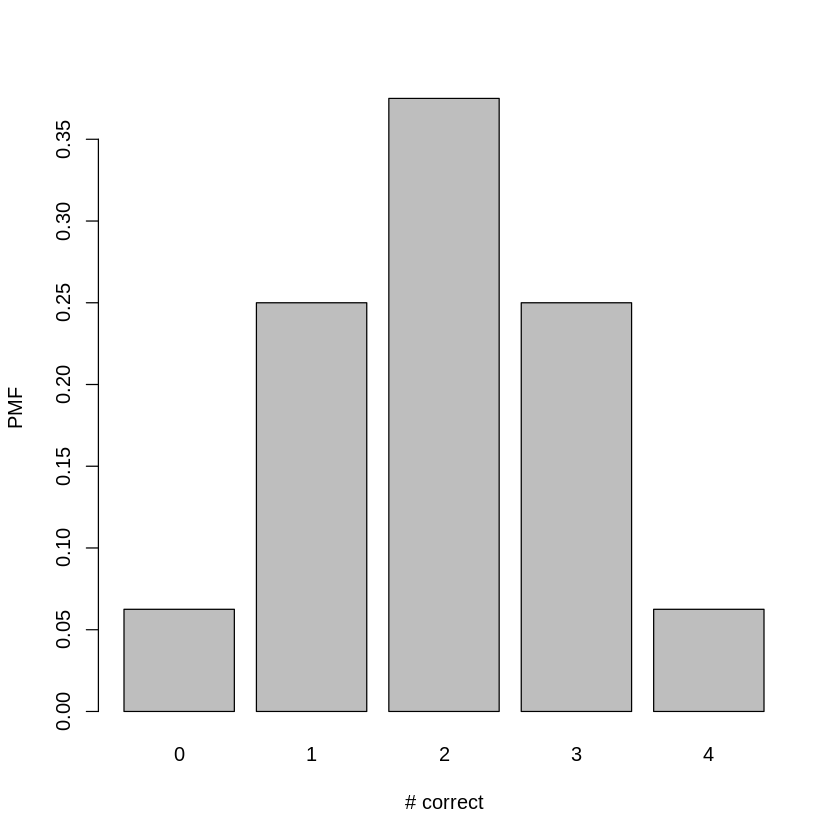

In [ ]:
barplot(pmf, names.arg=xvals, xlab="# correct", ylab="PMF")

### Task 12

The parameter $p$ in the binomial distribution tells us how likely you are to get any given question correct. To two decimal places, how high does $p$ need to be in order for the distribution of your number correct to be unimodal with the most likely number of correct answers at 4? Figure this out by trial-and-error and modifying the code cell below, which just recreates the PMF calculation and plot that we did above.

Then, write a sentence or two to interpret this result in the context of the Plinko problem set-up.

In [ ]:
xvals = c(0,1,2,3,4)
pmf = dbinom(x=xvals, size=4, p=0.5) # <-- CHANGE P HERE
barplot(pmf, names.arg=xvals, xlab="# correct", ylab="PMF")

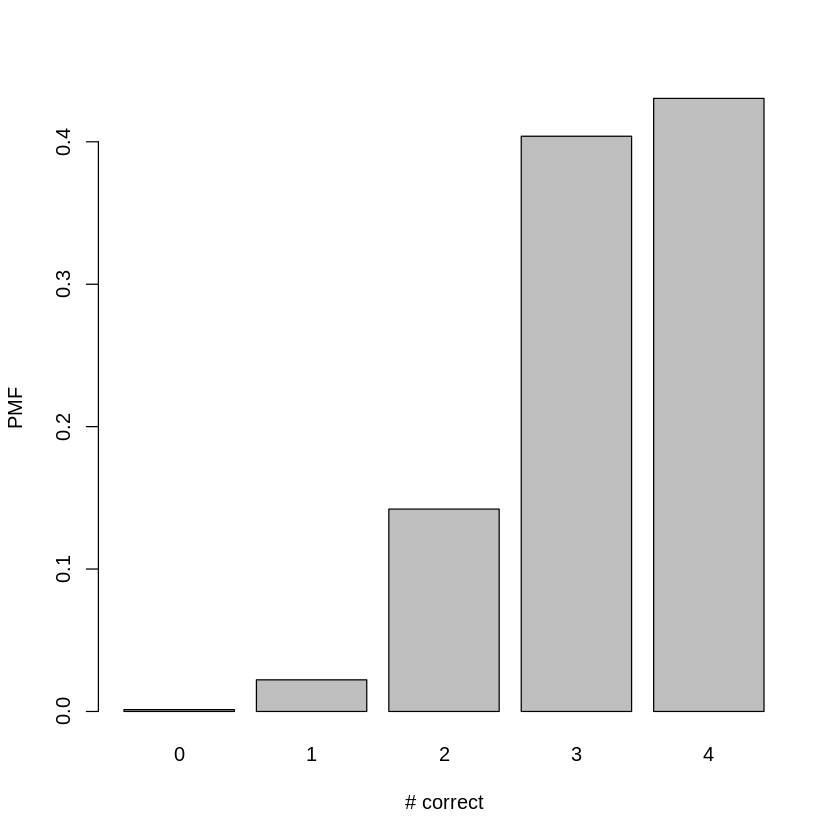

In [ ]:
# SOLUTION:

xvals = c(0,1,2,3,4)
pmf = dbinom(x=xvals, size=4, p=0.81)
barplot(pmf, names.arg=xvals, xlab="# correct", ylab="PMF")

You need to on average get 81\% of the questions correct in order for the most likely number of additional disks that you get to be 4.

### Task 13

Now, let $X$ be the random variable describing the resulting bin number from dropping a disk in a Plinko game with $n$ rows and probability $p$ of moving to the right off of each peg, shown below.  (Ignore the edges, and suppose all bins and bounces are independent.)

<img src="https://github.com/tonyewong/math251_fall2023/blob/master/figs/plinko.png?raw=true" width="300px">

In terms of $p$ (noting that the number of rows in this case is 3), what is the probability of the disk landing in Bin 0? Bin 3? Bin 2?

### SOLUTION:

$P(X=0) = (1-p)^3$

$P(X=3) = p^3$

$P(X=2) = 3p^2(1-p)$

### Task 14

S'pose you are practicing for Plinko and answering 12 questions about product prices. You have courage, so you studied and now have a 75% probability of answering any given question correctly.  What is your expected number of questions correct?  What is the standard deviation in the number of questions you get correct?

### SOLUTION:

$X = $ number of questions correct, so now $X \sim Bin(n=12, p=0.75)$

$E[X] = np = 12\cdot 0.75 = \fbox{$9$}$

$Var(X) = np(1-p) = 12\cdot 3/4\cdot (1-3/4) = 9/4$

$SD(X) = \sqrt{9/4} = \fbox{$3/2$}$

### Task 15

Given the prize structure depicted below for a 3-row Plinko game, if the pegs are unbiased ($p=1/2$), then what are the expected winnings with a single disk? Calculate this exactly by using the probability mass function for the resulting bin, $X$. You can execute your final calculations using an R code cell as a calculator, but you must show any relevant formulas and set-up in LaTeX/Markdown. Note that you may find it useful to use the `dbinom` function to calculation some relevant probabilities.

<img src="https://github.com/tonyewong/math251_fall2023/blob/master/figs/plinko_winnings.png?raw=true" width="300px">

### SOLUTION:

Let $X$ represent the bin the disc lands in. $X \sim Bin(n=3, p=1/2)$.

$\begin{align*}
  E[W] &= 0\cdot P(X=0) + (-2)\cdot P(X=1) + 10\cdot P(X=2) + 20\cdot P(X=3) \\
       &= -2\cdot 3\cdot (1/2)^3 + 10\cdot 3\cdot (1/2)^3 + 20\cdot (1/2)^3
\end{align*}$

In [ ]:
p = 1/2
0*dbinom(x=0, size=3, p=p) + -2*dbinom(x=1, size=3, p=p) + 10*dbinom(x=2, size=3, p=p) + 20*dbinom(x=3, size=3, p=p)

[1] 5.5

In [ ]:
# checking it
-2*3*1/8 + 10*3*1/8 + 20*1/8

[1] 5.5

### Task 16

Suppose that the crafty overlords at _The Price is Right_ have hired you to determine how they should bias the pegs so that the expected winnings from a single disk are \$0 when using the prize structure depicted in the figure from the previous task.  You must choose a bias that is between 0 and 1 because contestants would notice if the disks just never bounced to one side or the other.

First, purely based on the prize structure (\$0 for bin 0, loss of \$2 for bin 1, \$10 for bin 2, and \$20 for bin 3) and without doing any calculations yet, do you expect that the right-bounce bias $p$ to make the expected winnings \$0 will be greater than 1/2 or less than 1/2? Why?

### SOLUTION

To get a mean of 0, we will need the disc to move to the left more than to the right, since on the left we have our only negative value and a 0, but on the right we have large positive winnings. So, $p$ will need to be less than 1/2.

### Task 17

Now, estimate the right-bounce bias $p$ that will achieve a mean winnings of \$0. Do this by finishing the stochastic simulation I have started below and adjusting the value for the bias, $p$, until the expected winnings (`mean(W)`) is within 0.02 of \$0. Use at least 10,000 samples in the stochastic simulation. Checking numbers with other groups is a good idea, but note that answers will vary a bit because of the random nature of this task.

In [ ]:
num_samples = 10000
bias = 0.5
winnings = c(0,-2,10,20)
W = rep(0,num_samples)
for (i in 1:num_samples) {
  bin = rbinom(n=1, size=3, p=bias)
  W[i] = winnings[bin+1]
}
mean(W)

In [ ]:
# SOLUTION:

num_samples = 10000
bias = 0.145
winnings = c(0,-2,10,20)
W = rep(0,num_samples)
for (i in 1:num_samples) {
  bin = rbinom(n=1, size=3, p=bias)
  W[i] = winnings[bin+1]
}
mean(W)

[1] -0.0096

### Task 18

Now use the pmf for the bin based on $n=3$ rows and the as-yet unknown bias $p$ to set up an equation you could solve analytically for the bias $p$ that makes expected winnings equal to 0. Do not attempt to actually solve this equation. Since there are $n=3$ rows, the equation should be a 3rd order polynomial in $p$. Be sure to do all  of this in Markdown/LaTeX.

### SOLUTION:

Let $W_k$ be the winnings for bin $k$. Then:

$\begin{align*}
E[W] = 0 &= \sum_{k=0}^3 C(3,k) p^k (1-p)^{3-k} \cdot W_k \\
         &= 20p^3 + 10\cdot 3p^2(1-p) -2\cdot 3p(1-p)^2 + 0 \cdot (1-p)^3 \\
         &= 20p^3 + 30p^2(1-p) - 6p(1-2p+p^2) \\
         &= 20p^3 + 30p^2 - 30p^3 -6p + 12p^2 - 6p^3 \\
         &= -16p^3 + 42p^2  -6p \\
\end{align*}$

### Task 19

Okay, _now_ solve your equation from the previous task using whatever software/methods you choose. Be sure to justify why you picked the root that you did from among the several roots of the equation from the previous task that should exist.

Is this close to the bias that you estimated from the stochastic simulation in Task 16?

### SOLUTION:

Plugging the above equation into Wolfram Alpha gives $p \approx 0.15161$, so $\fbox{$p \approx 0.152$}$. Chose this root since it is the only one that is between 0 and 1 (and not equal to 0). This is close to what we estimated in Task 16.